In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [90]:
data = pd.read_csv('/Users/rajenparekh/Desktop/Brown/2024-25/Senior Thesis/Probe results.csv')
data.head()

,Layer,Checkpoint,Task,Linear BA,Small MLP BA,Large MLP BA,Linear SA,Small MLP SA,Large MLP SA
0,1,1,0,0.179,0.099,0.200,0.603,0.605,0.667
1,2,1,0,0.179,0.158,0.190,0.606,0.640,0.637
2,3,1,0,0.189,0.200,0.215,0.587,0.661,0.697
3,1,2,0,0.201,0.201,0.201,0.652,0.670,0.670
4,2,2,0,0.255,0.278,0.308,0.748,0.776,0.796


In [91]:
def plot_performance(task, same_scale=False):
    # Filter data for the task
    task_data = data[data['Task'] == task]
    
    # Define line styles for each model
    line_styles = {'Linear BA': '-', 'Small MLP BA': '--', 'Large MLP BA': '-.',
                   'Linear SA': '-', 'Small MLP SA': '--', 'Large MLP SA': '-.'}
    
    # Define more varied colors for each layer
    layer_colors = {1: 'tab:blue', 2: 'tab:orange', 3: 'tab:green'}
    
    # Create subplots for Board Accuracy (BA) and Space Accuracy (SA)
    fig, axes = plt.subplots(1, 2, figsize=(14, 8))  # Increased height for legends

    # Initialize a dictionary for the legend
    legend_handles = {layer: [] for layer in task_data['Layer'].unique()}
    legend_labels = {layer: [] for layer in task_data['Layer'].unique()}

    # Define models for BA and SA
    model_groups = {
        'BA': ['Linear BA', 'Small MLP BA', 'Large MLP BA'],
        'SA': ['Linear SA', 'Small MLP SA', 'Large MLP SA']
    }

    # Loop through each model type group (BA and SA)
    for metric, models in model_groups.items():
        for model in models:
            for layer in task_data['Layer'].unique():
                layer_data = task_data[task_data['Layer'] == layer]
                ax = axes[0] if metric == 'BA' else axes[1]
                line, = ax.plot(layer_data['Checkpoint'], layer_data[model], 
                                label=f'Layer {layer} {model}', 
                                linestyle=line_styles[model], 
                                color=layer_colors[layer])
                
                # Add lines to the legend
                legend_handles[layer].append(line)
                legend_labels[layer].append(f'{model}')

        # Set titles, labels, ticks, and y-limits
        ax.set_title(f'Task {task} - {metric} (Board Accuracy)' if metric == 'BA' else f'Task {task} - {metric} (Space Accuracy)')
        ax.set_xlabel('Checkpoint')
        ax.set_ylabel(f'{metric} (Accuracy)')
        ax.set_xticks([1, 2, 3, 4])
        ax.set_xticklabels([1, 2, 3, 4])
        if same_scale:
            ax.set_ylim(0, 1)  # Set y-axis from 0 to 1

    # Flatten and update the legends for both subplots
    handles_ba, labels_ba = [], []
    handles_sa, labels_sa = [], []

    for layer in legend_handles:
        for model_handle, model_label in zip(legend_handles[layer], legend_labels[layer]):
            if 'BA' in model_label:
                handles_ba.append(model_handle)
                labels_ba.append(f'{model_label} (Layer {layer})')
            else:
                handles_sa.append(model_handle)
                labels_sa.append(f'{model_label} (Layer {layer})')

    # Set separate legends below each subplot
    axes[0].legend(handles=handles_ba, labels=labels_ba, loc='upper center', bbox_to_anchor=(0.5, -0.2),
                   ncol=3, title='Board Accuracy (BA) Legend')
    axes[1].legend(handles=handles_sa, labels=labels_sa, loc='upper center', bbox_to_anchor=(0.5, -0.2),
                   ncol=3, title='Space Accuracy (SA) Legend')

    # Adjust layout to accommodate legends
    plt.tight_layout(rect=[0, 0.15, 1, 1])
    plt.show()


In [92]:
def compare_tasks_by_model_and_layer(task0=None, task1=None, task2=None):
    tasks = []
    if task0 is not None:
        tasks.append(task0)
    if task1 is not None:
        tasks.append(task1)
    if task2 is not None:
        tasks.append(task2)

    metrics = ['BA', 'SA']
    model_names = ['Linear', 'Small MLP', 'Large MLP']
    model_styles = {'Linear': '-', 'Small MLP': '--', 'Large MLP': '-.'}
    task_colors = {task0: 'tab:blue', task1: 'tab:orange', task2: 'tab:green'}

    all_layers = sorted(data['Layer'].unique())

    for layer in all_layers:
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows x 3 models

        for row_idx, metric in enumerate(metrics):
            for col_idx, model_name in enumerate(model_names):
                ax = axes[row_idx, col_idx]
                model_key = f'{model_name} {metric}'

                for task in tasks:
                    task_data = data[(data['Task'] == task) & (data['Layer'] == layer)]
                    grouped = task_data.groupby('Checkpoint')[model_key].mean().reset_index()

                    ax.plot(grouped['Checkpoint'], grouped[model_key],
                            label=f'Task {task}',
                            linestyle=model_styles[model_name],
                            color=task_colors[task])

                ax.set_title(f'{model_name} - {metric} - Layer {layer}')
                ax.set_xlabel('Checkpoint')
                ax.set_ylabel('Accuracy')
                ax.set_xticks([1, 2, 3, 4])
                ax.set_ylim(0, 1)
                ax.legend()

        plt.tight_layout()
        plt.show()


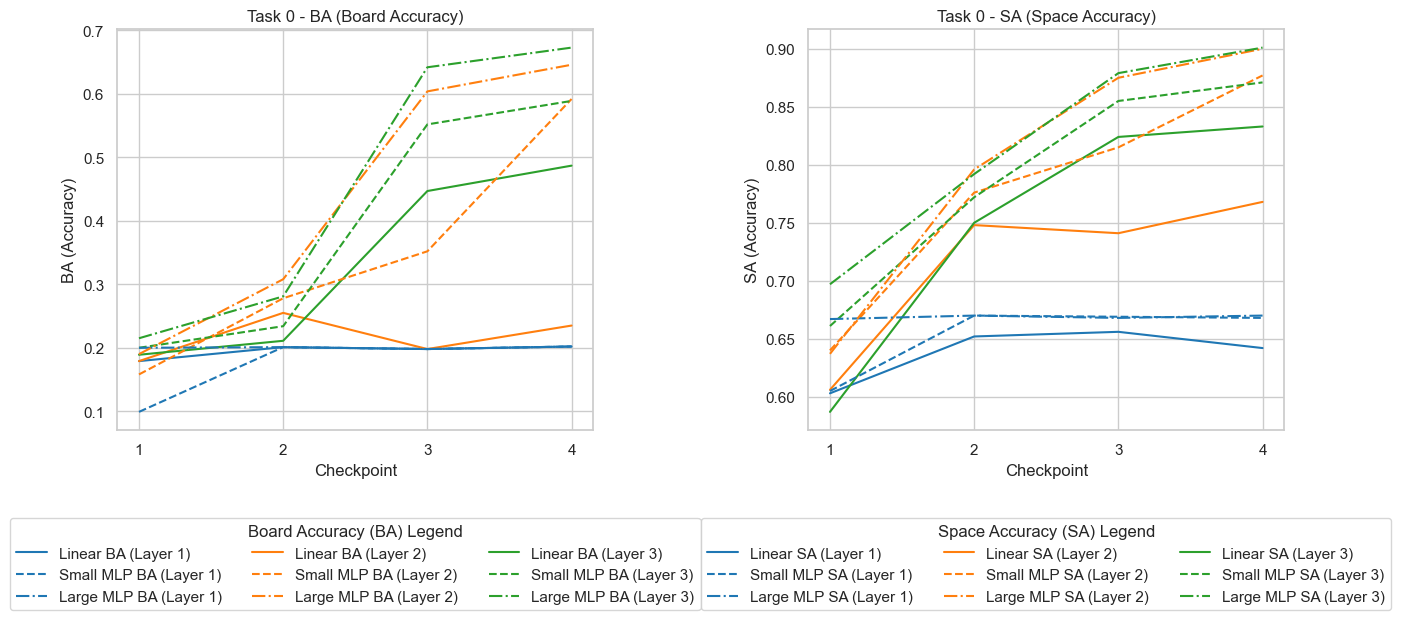

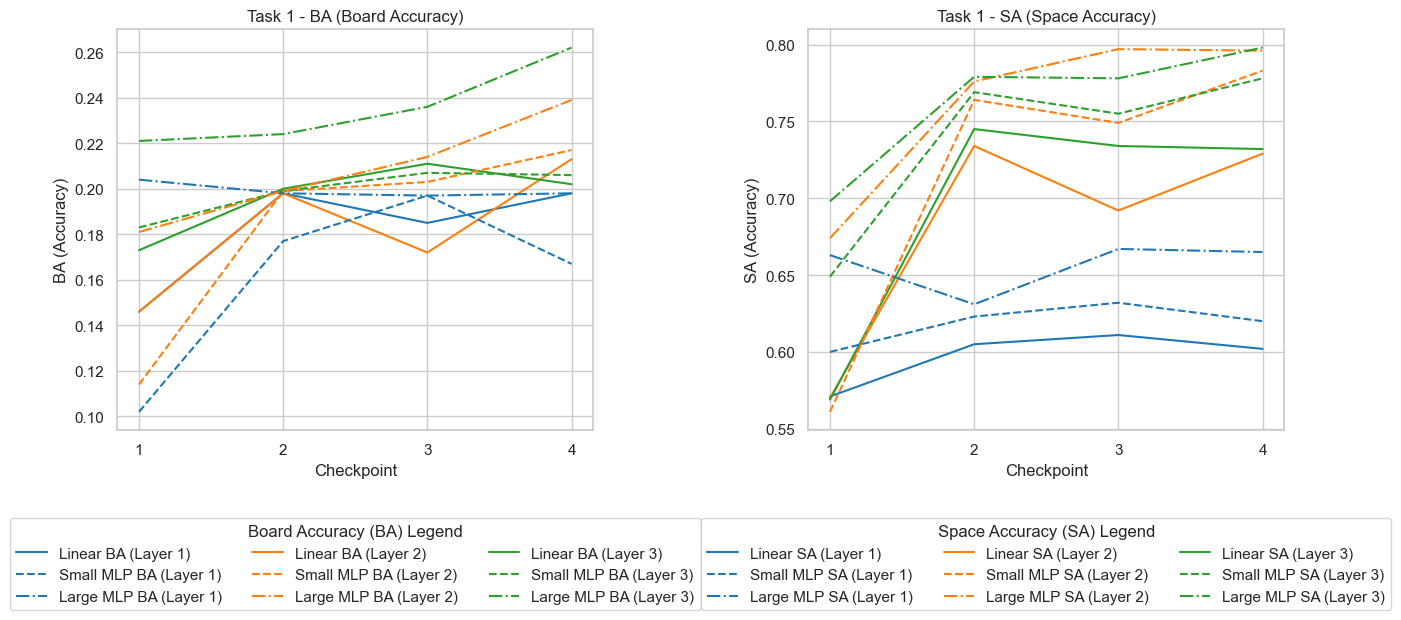

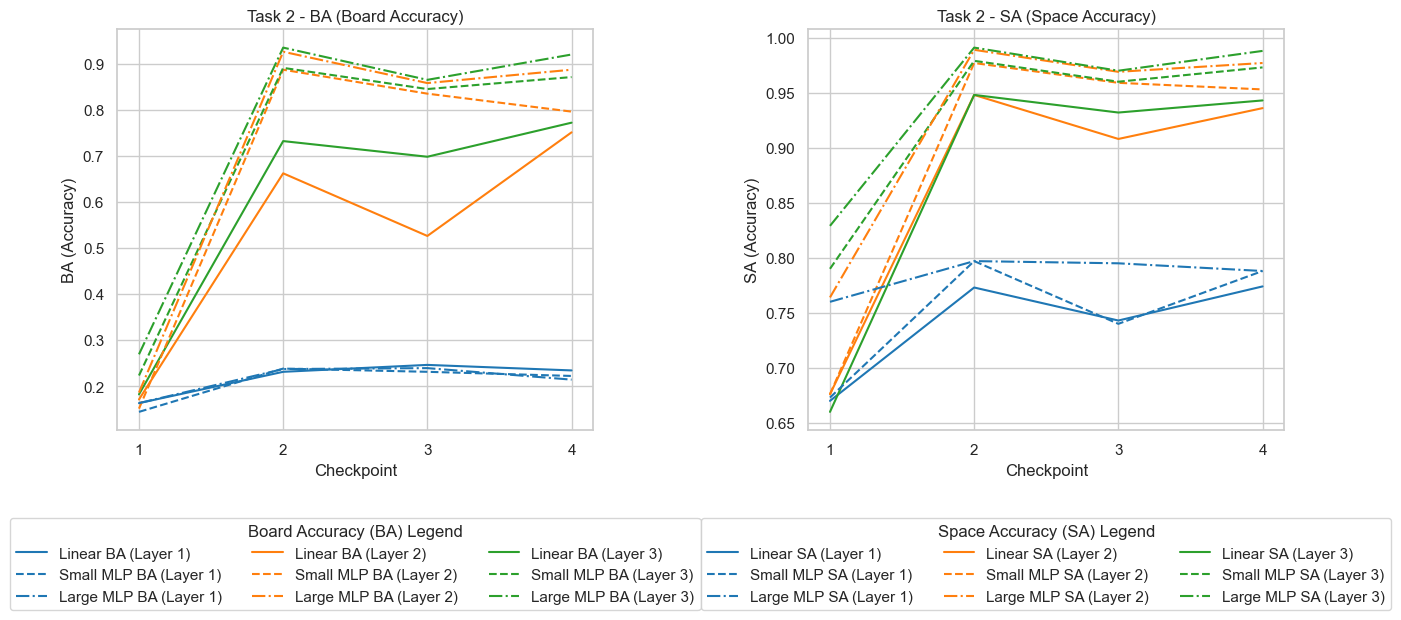

In [93]:
for task in range(3):
    plot_performance(task, same_scale=False)

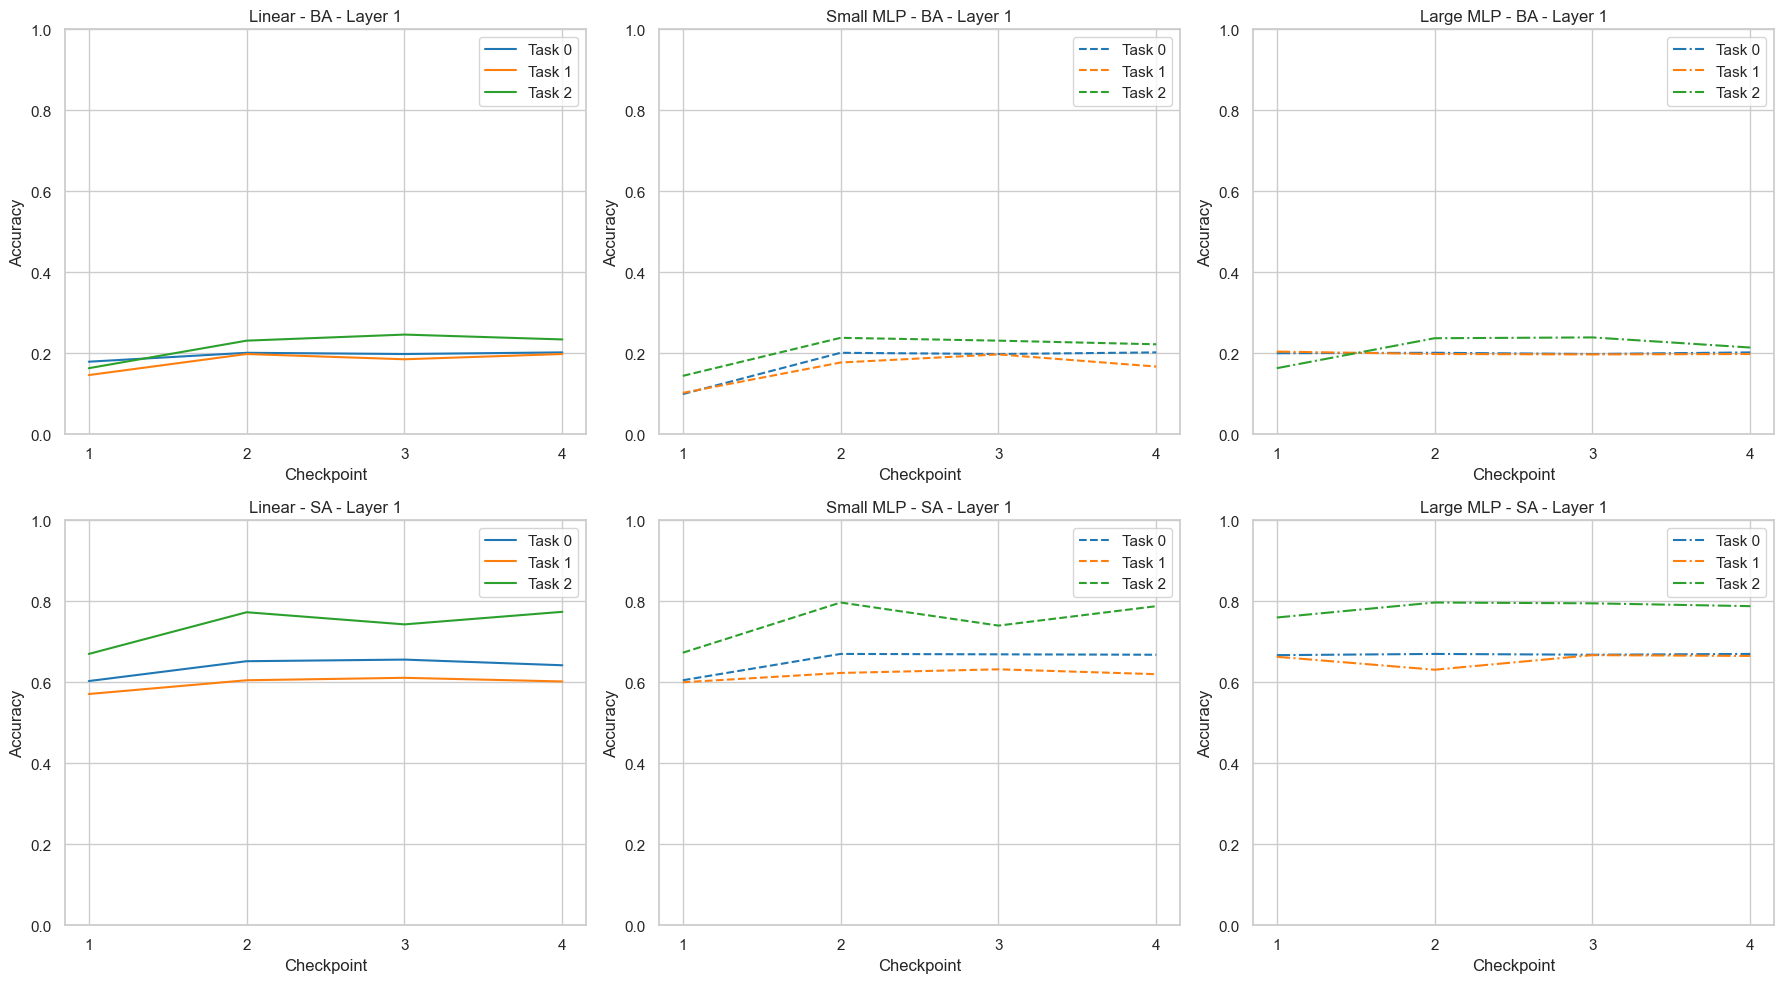

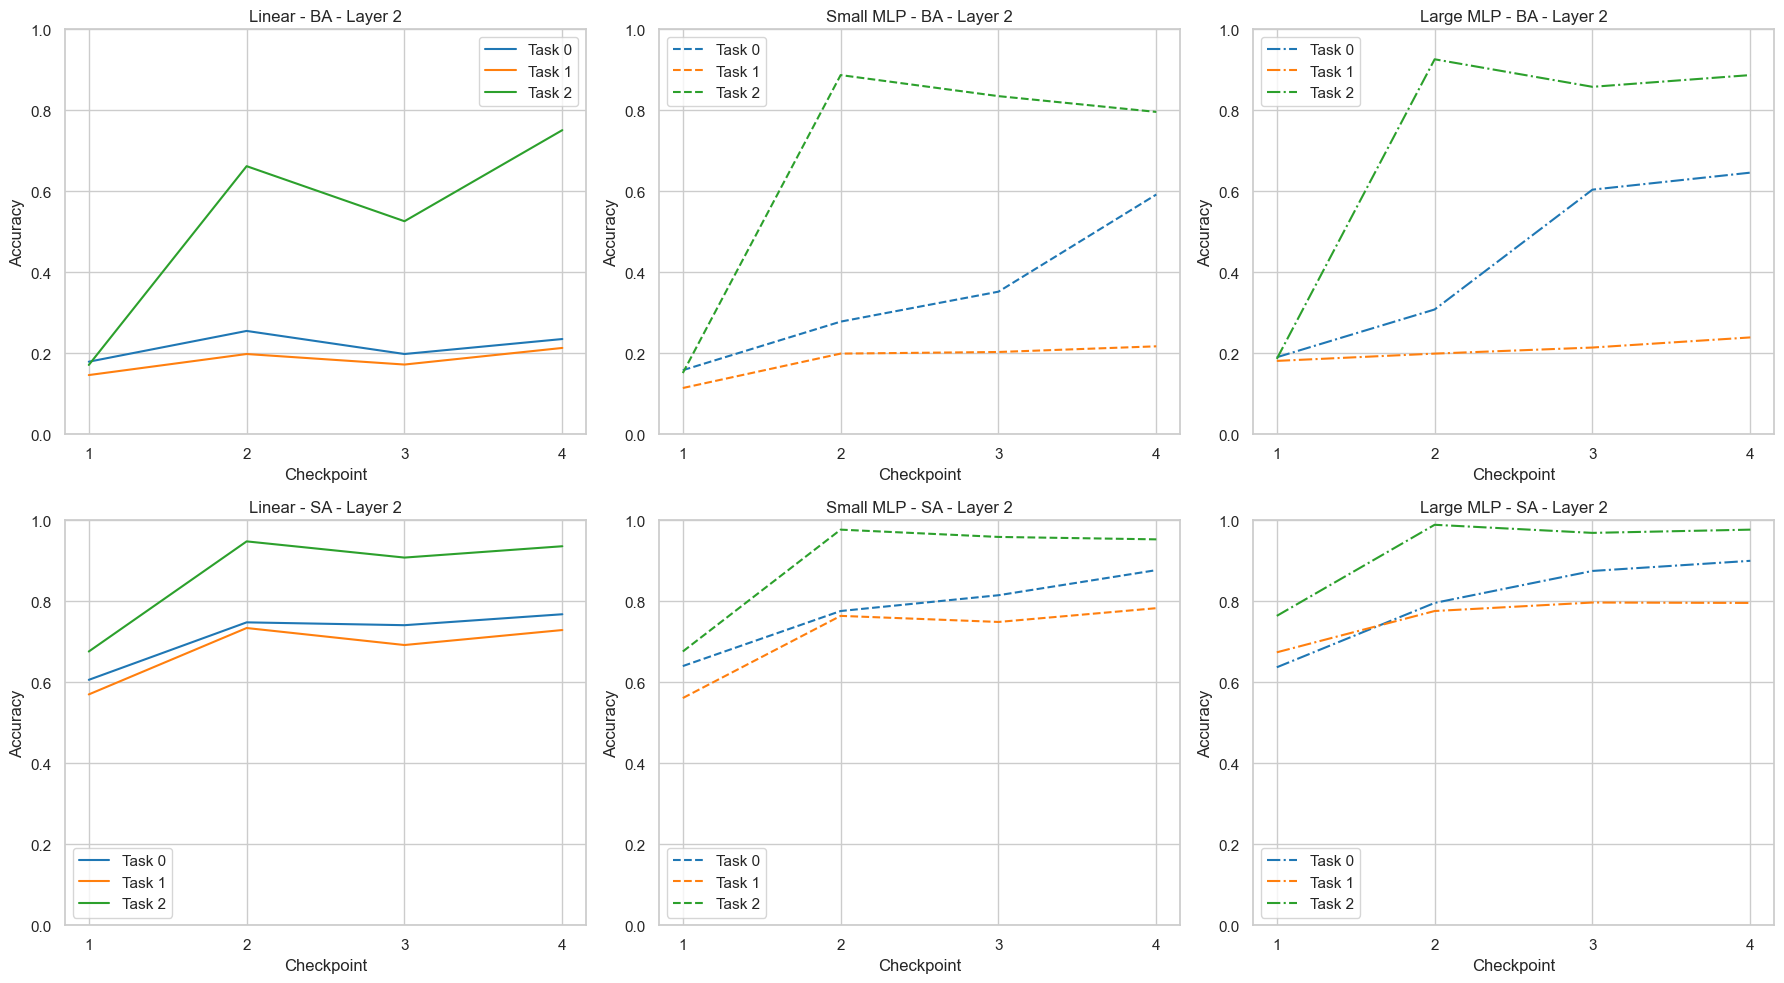

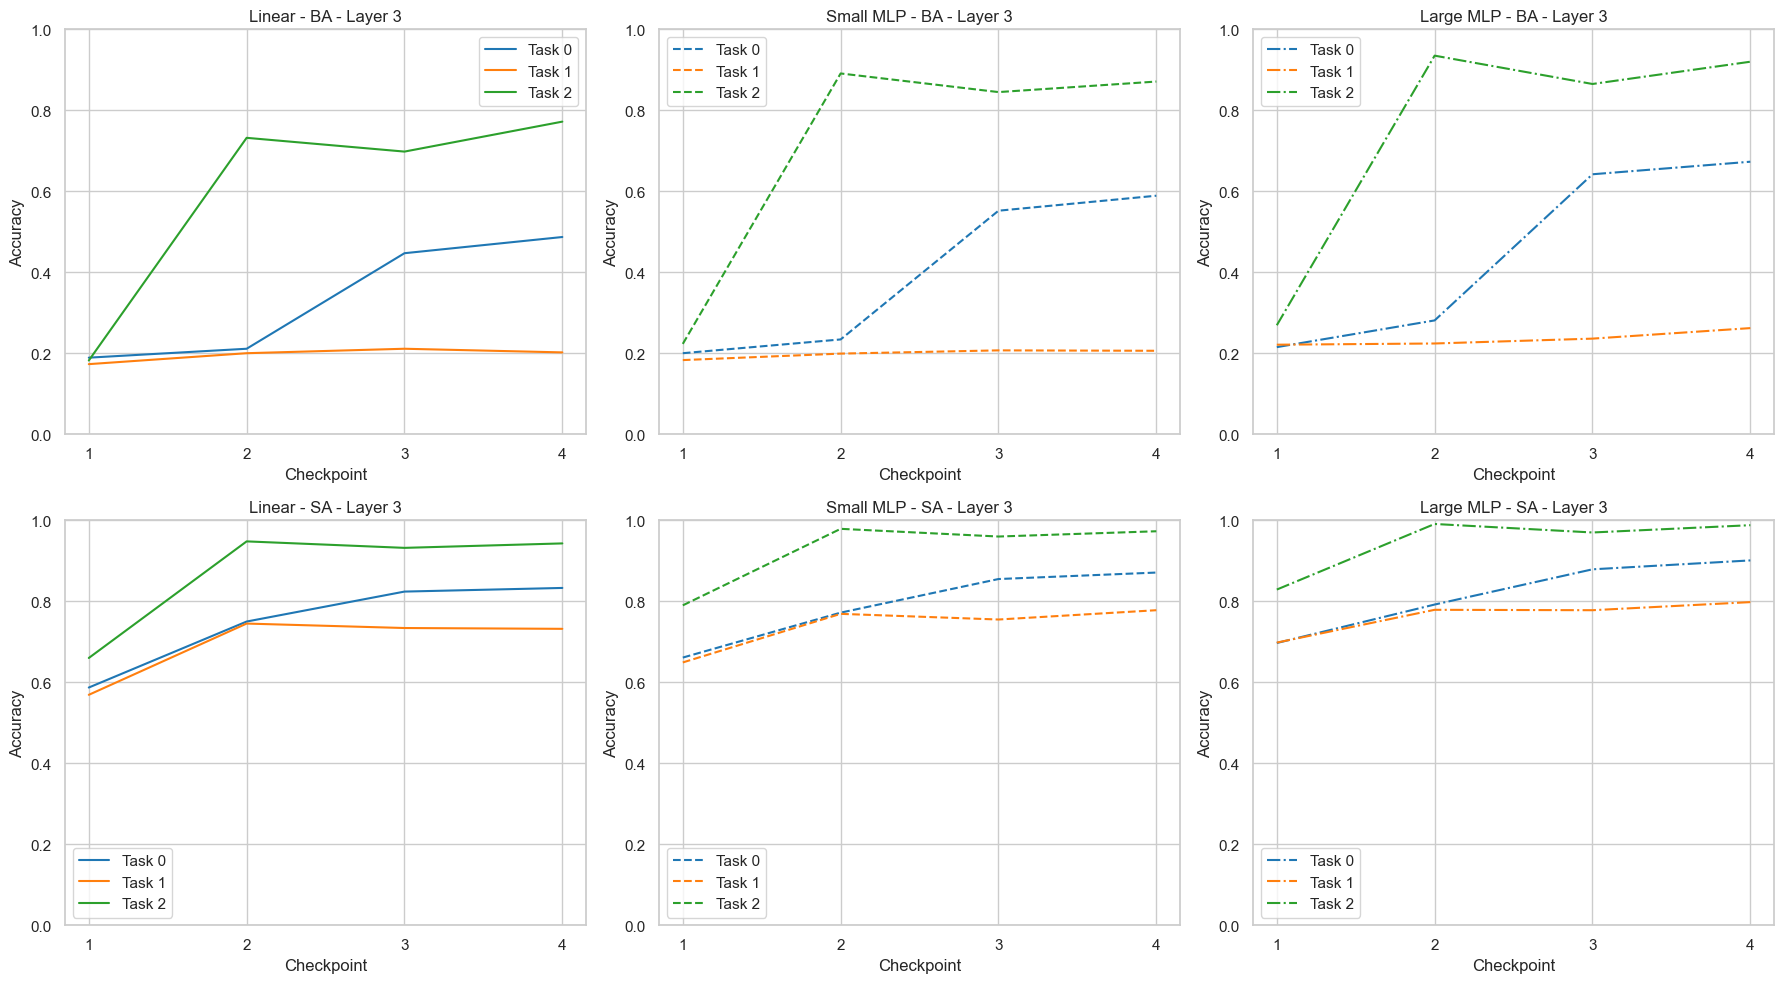

In [95]:
compare_tasks_by_model_and_layer(0, 1, 2)